# Using k means algorithm to cluster the Iris dataset

### Imports to be used later

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Looking at the dataset

### Importing in the iris dataset, found how to do this on Wikepedia

Dataset contains 150 samples evenly distributed of 3 different species of Iris flower. Each sample has 4 features: petal length, petal width, sepal length and sepal width measured in cm. 

The data is read in as a bunch. Bunch is an extended python dict. Can think of data as a matrix

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()

In [9]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [10]:
print(iris['target'])
print(len(iris['target']))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
150


In [15]:
len(iris['data'])

150

In [16]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Scaling the dataset

In [17]:
#creating the scaler
scaler = StandardScaler()

#seperating the dataset
X_iris = iris['data']
target = iris['target']

scaled_data = scaler.fit_transform(X_iris)

# k-means clustering

### Seperating each measurement into its own array using slicing

Note: order of features is sepal Length, sepal width, petal length, petal width

Note: the model is being fit on scaled data

In [18]:
#Matrix of measurments
m = scaled_data

#Putting each feature into its own array
sLength = m[:,0]
sWidth = m[:,1]
pLength= m[:,2]
pWidth = m[:,3]

#creating a list of those arrays
features = [sLength,sWidth,pLength,pWidth]

#array of Feature names
names = ['Sepal Length', 'Sepal Width','Petal Length','Petal Width']

In [19]:
#creating and fitting the model
kmeans = KMeans(n_clusters=3)
kmneans = kmeans.fit_transform(m)

#get the centroids, matrix with headings
# [sLength centre, sWidth centre, pLength centre, pWidth centre]

centers= kmeans.cluster_centers_
print(centers)

#groups by species
group = iris['target']

[[ 1.13597027  0.08842168  0.99615451  1.01752612]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [-0.05021989 -0.88337647  0.34773781  0.2815273 ]]


Note: if you keep running the above cell the centroids will change ... multiple iterations??

### Scatter for two variables

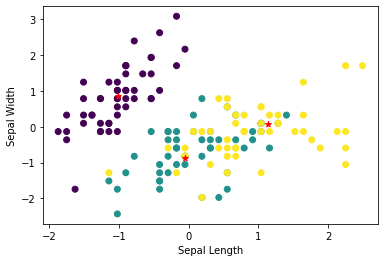

In [20]:
#plotting the scatter graphs of 2 variables 
plt.scatter(sLength,sWidth,c=group)
plt.xlabel(names[0])
plt.ylabel(names[1])


plt.scatter(centers[:,0], centers[:,1],marker="*",color='r')
plt.show()


### Six projections of the Iris dataset as a result of k-means clustering with k=3

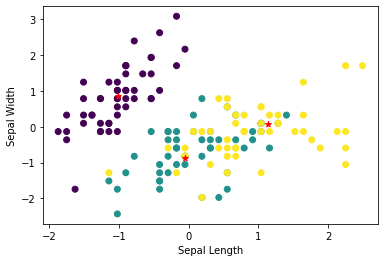

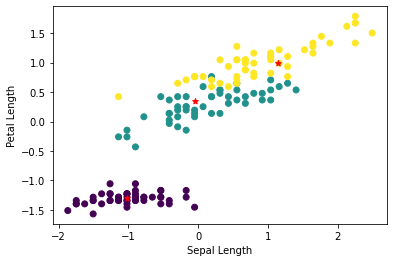

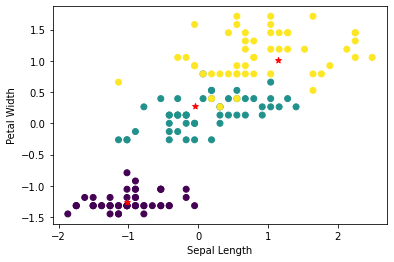

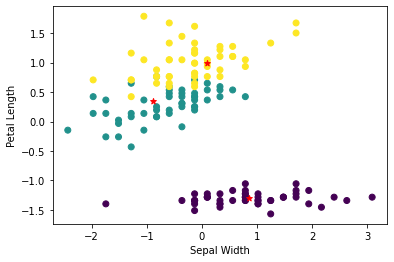

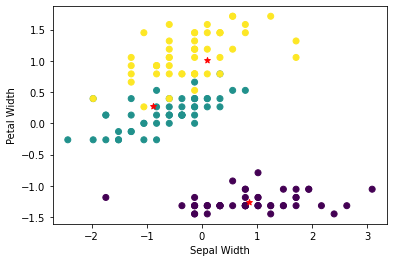

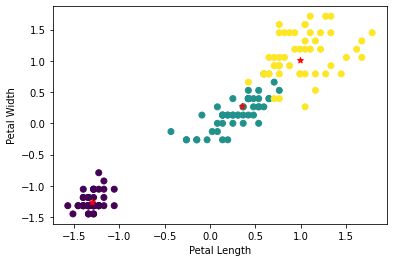

In [21]:
for i in range(0,4):
    for j in range(i+1,4):
        plt.scatter(features[i],features[j],c=group)
        plt.xlabel(names[i])
        plt.ylabel(names[j])


        plt.scatter(centers[:,i], centers[:,j],marker="*",color='r')
        plt.show()

### Plotting Inertia as a function of number of clusters

Note: Inertia is how well a dataset was clustered using K-Means. This is computed by calculating the squared distance of each sample in a cluster to it's centroid and summing these squares across one cluster. 

In [28]:
#function that returns a list showing teh interia of varying k for a dataset
def anaylse_clusters(n,df):
    inertia_list = []
    
    for k in range(2,n+1):
        #creating and fitting the model using k clusters 
        kmeans = KMeans(n_clusters=k)
        kmneans = kmeans.fit_transform(df)
        #finding the inertia and 
        inertia_list.append(kmeans.inertia_)
    
    return inertia_list

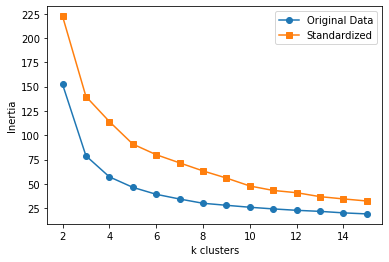

In [40]:
#creating plot with 15 clusters

#calling the function above on the scaled iris dataset
in_list_scaled= anaylse_clusters(15,scaled_data)

#calling the function above on the original iris dataset
in_list_original = anaylse_clusters(15,X_iris)

k = []
for i in range(2,16):
    k.append(i)
    
plt.plot(k,in_list_original,'o-')
plt.plot(k,in_list_scaled,'s-')
plt.xlabel('k clusters')
plt.ylabel('Inertia')
plt.legend(['Original Data','Standardized'])
plt.savefig('inertia.jpg')
plt.show()

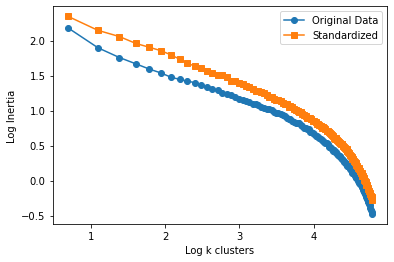

In [41]:
#creating plot with 120 clusters

#calling the function above on the scaled iris dataset
in_list_scaled= np.log10(anaylse_clusters(120,scaled_data))

#calling the function above on the original iris dataset
in_list_original = np.log10(anaylse_clusters(120,X_iris))

k = []
for i in range(2,121):
    k.append(np.log(i))
    
plt.plot(k,in_list_original,'o-')
plt.plot(k,in_list_scaled,'s-')
plt.xlabel('Log k clusters')
plt.ylabel('Log Inertia')
plt.legend(['Original Data','Standardized'])
plt.savefig('logInertia.jpg')
plt.show()